In [51]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

First, let's define a helper function to plot two images side-by-side. You will not need to understand this code this moment, but this function will be used repeatedly in this tutorial to showcase the results. 


In [52]:
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

#  Geometric Transformations


 Geometric transformations allow you to perform different operations like translation, i.e. to shift, reshape and rotate the image.


We can resize an image using the method  <code>resize()</code> of <code>PIL</code> images, which takes the resized image's <code>width</code> and <code>height</code> as paramters. 

Consider the following image:


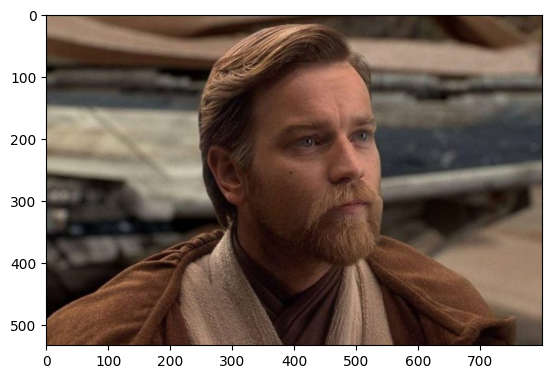

In [53]:
image = Image.open("../../assets/obiwan.jpg")
plt.imshow(image)
plt.show()

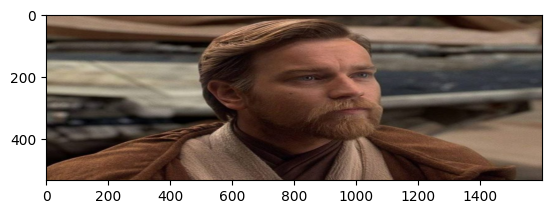

In [54]:
width, height = image.size
new_width = 2 * width
new_height = height
new_image = image.resize((new_width, new_height))
plt.imshow(new_image)
plt.show()

In the same manner, we can scale the vertical axis by two:


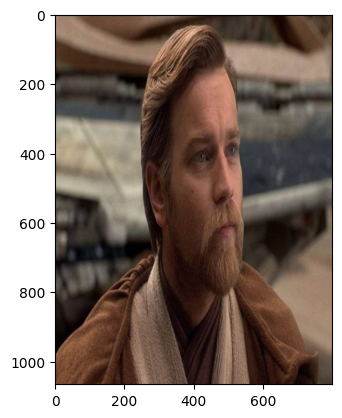

In [55]:
new_width = width
new_height = 2 * height
new_image = image.resize((new_width, new_height))
plt.imshow(new_image)
plt.show()

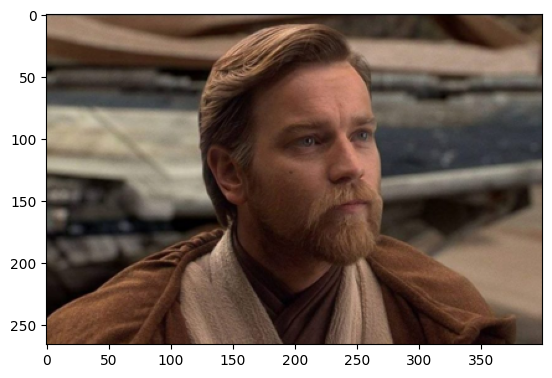

In [56]:
new_width = width // 2
new_height = height // 2

new_image = image.resize((new_width, new_height))
plt.imshow(new_image)
plt.show()

## Rotation 


We can rotate an image by angle $\theta$, using the method `rotate`.


We can rotate our toy image by 45 degrees:


In [57]:
theta = 45
new_image = image.rotate(theta)

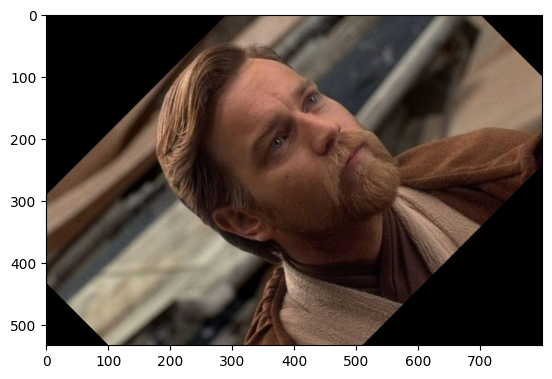

In [58]:
plt.imshow(new_image)
plt.show()

## Array Operations 


We can perform array operations on an image; Using Python broadcasting, we can add a constant to each pixel's intensity value. 

Before doing that, we must first we convert the PIL image to a numpy array.


In [59]:
image = np.array(image)

We can then add the constant to the image array:


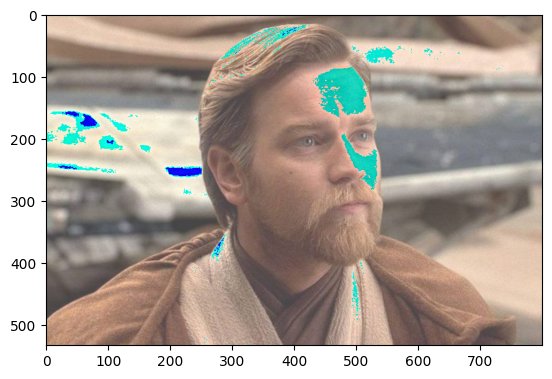

In [60]:
new_image = image + 70
plt.imshow(new_image)
plt.show()

We can also multiply every pixel's intensity value by a constant value.


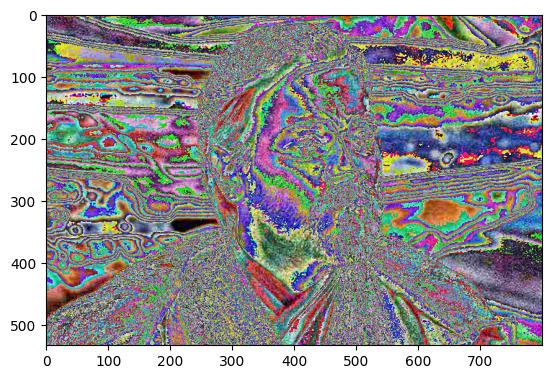

In [61]:
new_image = 10 * image
plt.imshow(new_image)
plt.show()

We can add the elements of two arrays of equal shape. In this example, we generate an array of random noises with the same shape and data type as our image.


In [62]:
Noise = np.random.normal(0,20,(height,width,3)).astype(np.uint8)
Noise.shape

(533, 800, 3)

We add the generated noise to the image and plot the result. We see the values that have corrupted the image:


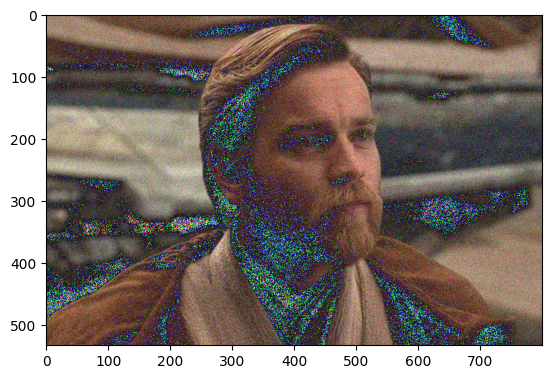

In [63]:
new_image = image + Noise

plt.imshow(new_image)
plt.show()

At the same time, we can multiply the elements of two arrays of equal shape. We can multiply the random image and the Lenna image and plot the result. 


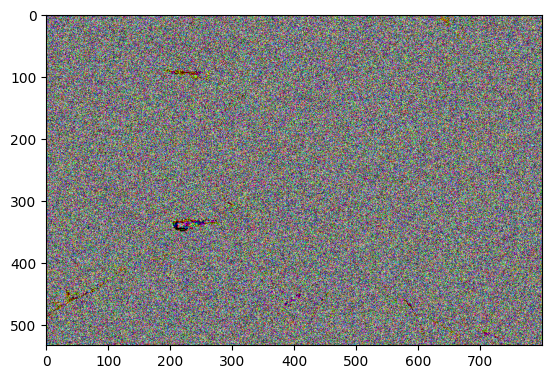

In [64]:
new_image = image*Noise

plt.imshow(new_image)
plt.show()

## Matrix Operations 


Grayscale images are matrices. Consider the following grayscale image:


In [65]:
im_gray = Image.open("../../assets/goldhill.bmp")

Even though the image is gray, it has three channels; we can convert it to a one-channel image.


In [66]:
from PIL import ImageOps

In [67]:
im_gray = ImageOps.grayscale(im_gray)

We can convert the PIL image to a numpy array:

In [68]:
im_gray = np.array(im_gray)

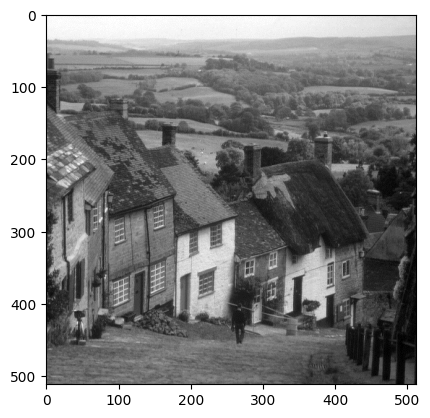

In [69]:
plt.imshow(im_gray, cmap="gray")
plt.show()

We can apply algorithms designed for matrices.  We can use  Singular Value Decomposition, decomposing our image matrix into  a product of three matrices.


In [70]:
U, s, V = np.linalg.svd(im_gray, full_matrices=True)

We see <code>s</code> is not rectangular:


In [71]:
s.shape

(512,)

We can convert  <code>s</code> to a diagonal matrix <code>S</code>:


In [72]:
S = np.zeros((im_gray.shape[0], im_gray.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)

We can plot the matrix U and V:


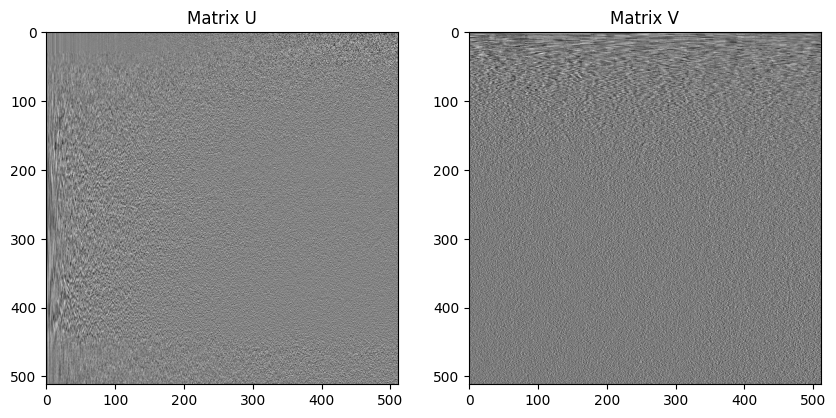

In [73]:
plot_image(U, V, title_1="Matrix U", title_2="Matrix V")

We see most of the elements in S are zero:


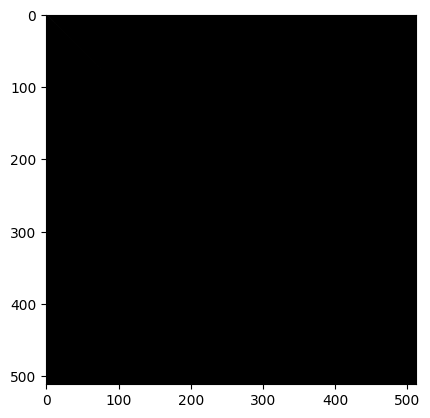

In [74]:
plt.imshow(S, cmap="gray")
plt.show()

We can find the matrix product of all the  matrices. First, we can perform matrix multiplication on S and U and assign it to `B` and plot the results: 


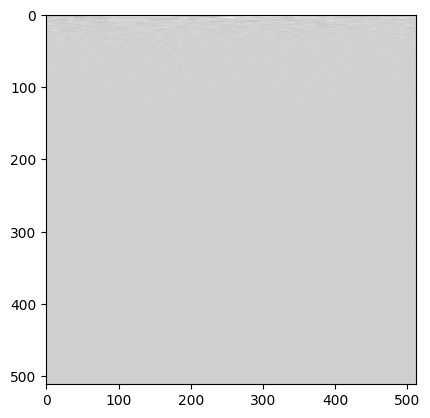

In [75]:
B = S.dot(V)
plt.imshow(B,cmap='gray')
plt.show()

We can find the matrix product of `U`, `S`, and `B`. We see it's the entire image:


In [76]:
A = U.dot(B)

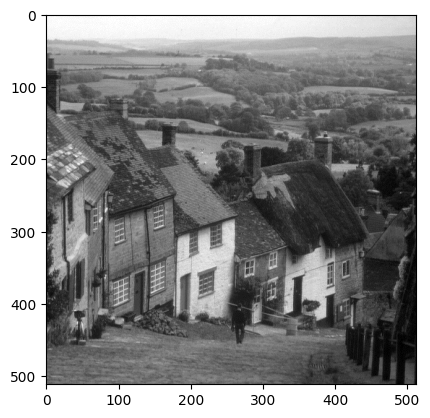

In [77]:
plt.imshow(A, cmap="gray")
plt.show()

It turns out that many elements are redundant. We can eliminate some rows and columns of S and V and approximate the image by finding the product:


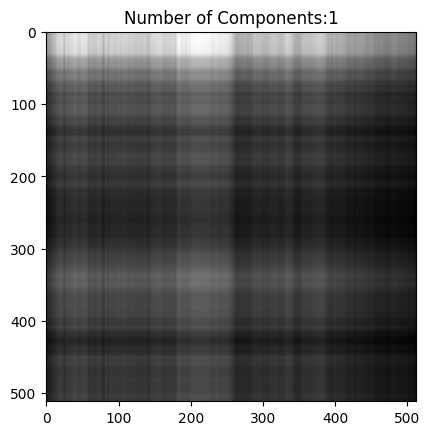

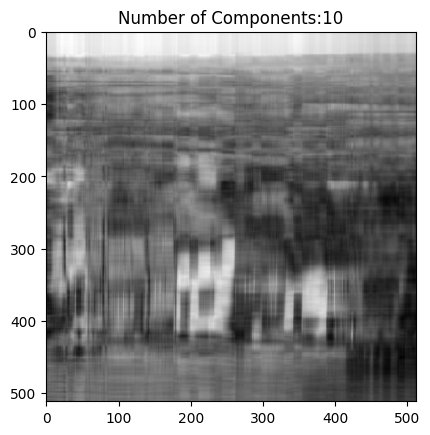

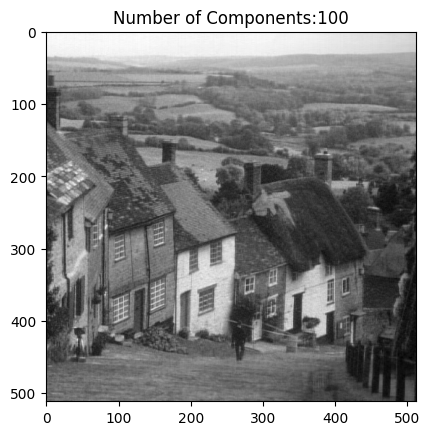

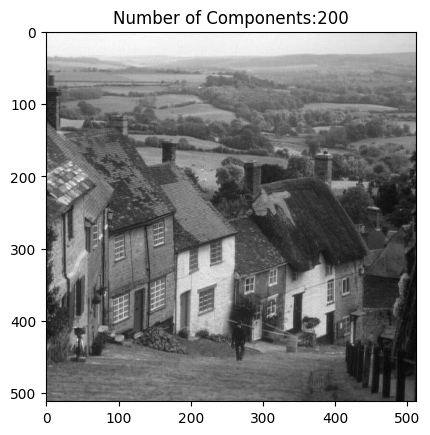

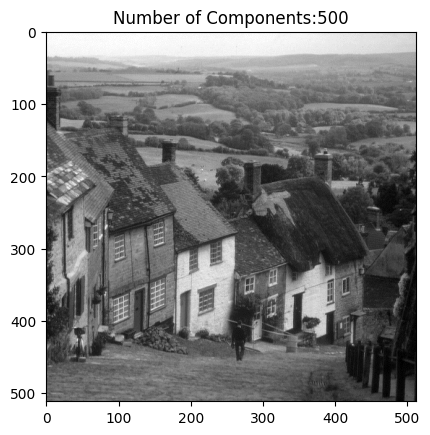

In [78]:
for n_component in [1, 10, 100, 200, 500]:
    S_new = S[:, :n_component]
    V_new = V[:n_component, :]
    A = U.dot(S_new.dot(V_new))
    plt.imshow(A, cmap="gray")
    plt.title("Number of Components:" + str(n_component))
    plt.show()